The Universal Approximation theorem tell us that we can approximate any function by neural networks. And the gradient decent allow us to search for a good parametervalue. In this worksheet, we learn how these principle work in action.

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

Our first goal is to find a neural network that approximate the cosine function. To do this, we first construct the cosine function, which is a pair of x and y.

In [2]:
x = torch.linspace(-2*np.pi, 3*np.pi, 1000).unsqueeze(1)
y = torch.cos(x)

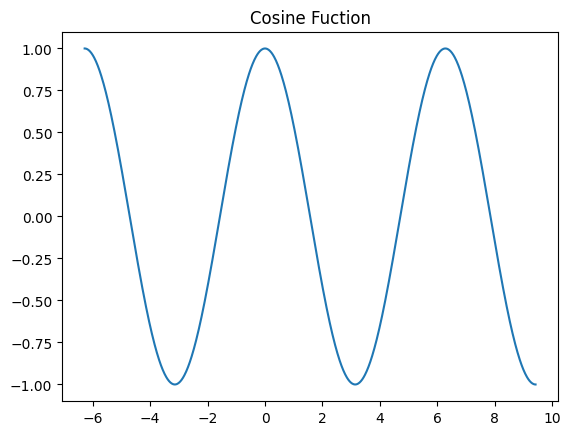

In [3]:
plt.plot(x, y)
plt.title("Cosine Fuction")
plt.show()

Next we construct a class of neural network with three layers and we will use gradient decent to search for a member in this class that can approximate the function we want.

In [4]:
torch.manual_seed(18)

In [5]:
class Neural_Approximator(nn.Module):
  def __init__(self):
    super(Neural_Approximator,self).__init__()
    self.fc1=nn.Linear(1,20)
    self.relu=nn.ReLU()
    self.fc2=nn.Linear(20,45)
    self.fc3=nn.Linear(45,1)
  def forward(self,x):
    x=self.fc1(x)
    x=self.relu(x)
    x=self.fc2(x)
    x=self.relu(x)
    x=self.fc3(x)
    return x

In [6]:
model = Neural_Approximator()

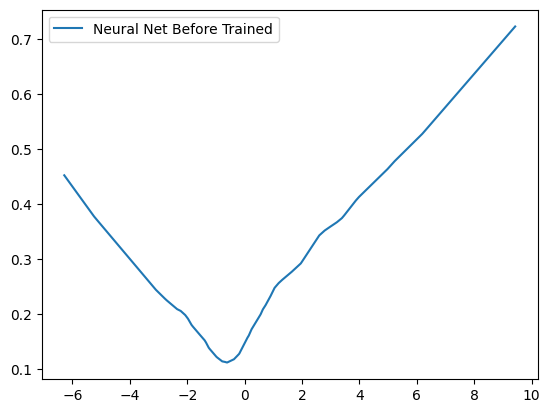

In [7]:
with torch.no_grad():
    y_predicted = model(x)
plt.plot(x, y_predicted, label = "Neural Net Before Trained")
plt.legend()

To train a neural network, we need a loss function and an learning algorithm. In the following, we choose mean square loss (MSE) is our loss function. And we use adam algorithm for the learning algorithm. The learning rate here is lr=0.001

In [8]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
n_epoch = 5000
loss_history = []

AttributeError: Line2D.set() got an unexpected keyword argument 'lineuidth'

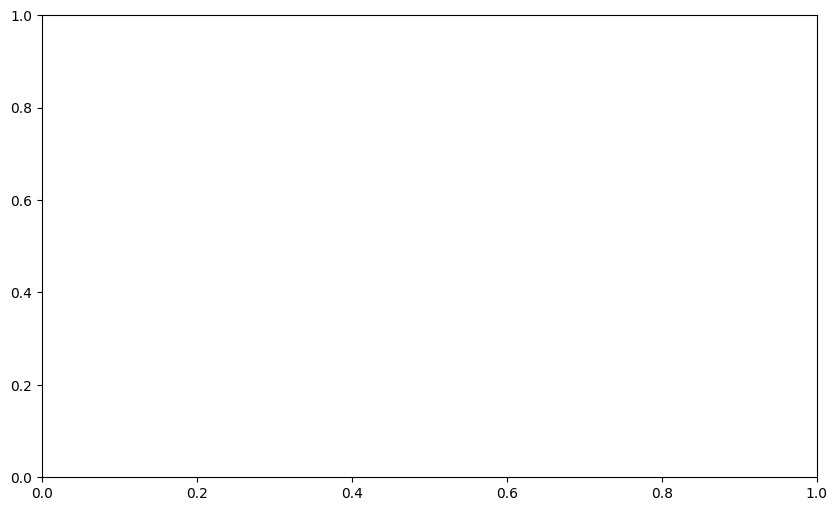

In [9]:
for epoch in range(n_epoch):
  y_pred=model(x)
  loss=criterion(y_pred,y)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  loss_history.append(loss.item())
model.eval()
with torch.no_grad():
  y_predicted=model(x)
plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), np.cos(x.numpy()), label='True $\cos(x)$', color='blue', lineuidth=3)
plt.plot(x.numpy(), y_predicted, label='NN Approximation', color='red', linestyle='--', lineuidth=2)
plt.title('Neural Network Approximation of $\cos(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()


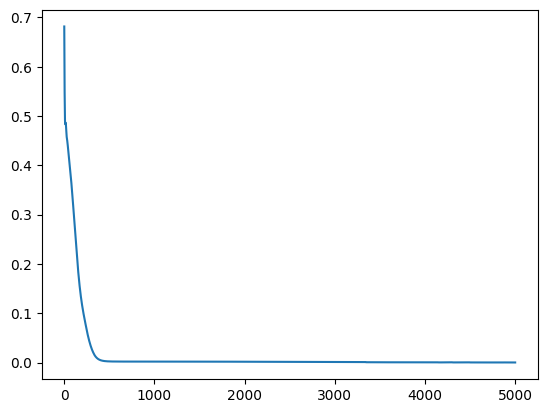

In [ ]:
plt.plot(loss_history)

Next we try to approximate the sine function. The different here is that instead of using gradient decent, we use stochastic gradient decent.

In [ ]:
# Now we set up the model and prepare for the training.
z=torch.sin(x) # this is our data of the sine function
model2=Neural_Approximator()
optimizer2=optim.Adam(model2.parameters(),lr=0.001)
from torch.utils.data import TensorDataset, DataLoader
train_dataset=TensorDataset(x,z)
train_loader=DataLoader(train_dataset,batch_size=100,shuffle=True)
loss_history_2=[]

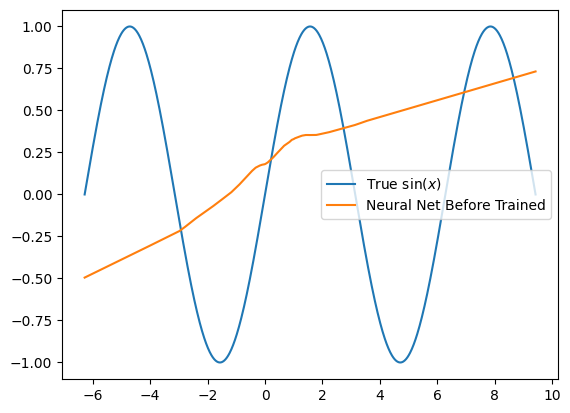

In [ ]:
#Now we want to see what the neural network look like before we train it.
with torch.no_grad():
  z_nn=model2(x)

plt.plot(x,z,label='True $\sin(x)$')
plt.plot(x,z_nn,label='Neural Net Before Trained')
plt.legend()
plt.show()

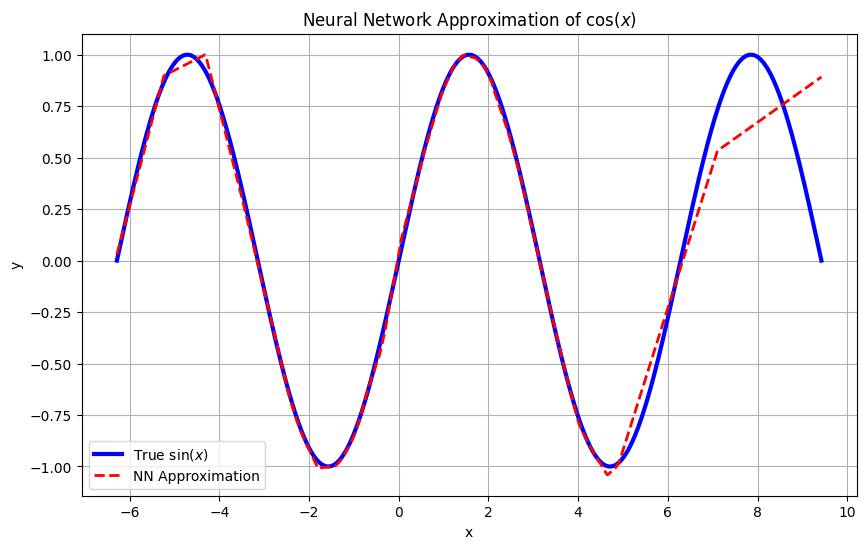

In [ ]:
for epcoh in range(500):
    for inputs, targets in train_loader:
        z_pred = model2(inputs)
        loss = criterion(z_pred, targets)
        optimizer2.zero_grad()
        loss.backward()
        optimizer2.step()
        loss_history_2.append(loss.item())
with torch.no_grad():
    z_predicted = model2(x)

plt.figure(figsize=(10, 6))
plt.plot(x.numpy(), np.sin(x.numpy()), label='True $\sin(x)$', color='blue', lineuidth=3)
plt.plot(x.numpy(), z_predicted, label='NN Approximation', color='red', linestyle='--', lineuidth=2)
plt.title('Neural Network Approximation of $\cos(x)$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

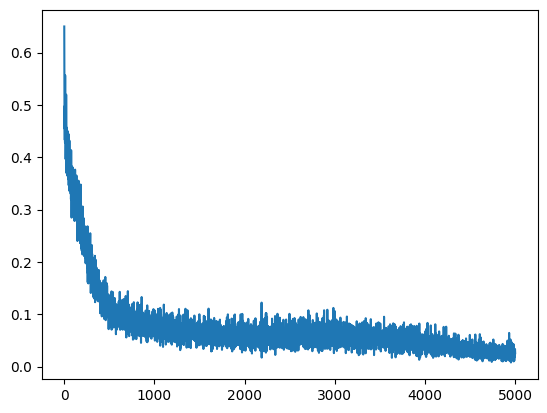

In [ ]:
plt.plot(loss_history_2)

Exercise 1: Find a netural network $f_{neu}$ with 2 layers that can approximate $f(x)=e^{0.2x}\sin(x^2)+x/(1+\cos(x)+x^2)$ on the interval $[-2,4]$. Plot $f$ and $f_{neu}$ in the same coorindate frame.

Exercise 2: Find an RNN that can approximate $f_1(x)=x^3-\sin(x),f_2(x,y)=y^2-3xy$ for $x\in [-3,2]$ and $y\in [0,2]$

Exercise 1

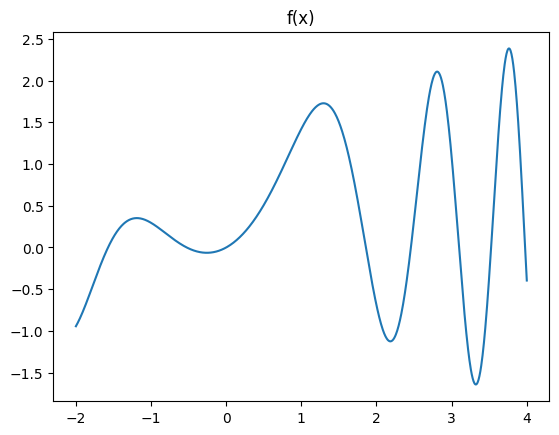

In [ ]:
x = torch.linspace(-2, 4, 1000).unsqueeze(1)
f = torch.exp(0.2*x)*torch.sin(x**2) + x / (1 + torch.cos(x) + x**2)

plt.plot(x, f)
plt.title("f(x)")
plt.show()

In [ ]:
class Neural_Approximator(nn.Module):
  def __init__(self):
    super(Neural_Approximator,self).__init__()
    self.fc1=nn.Linear(1,100)
    self.fc2=nn.Linear(100,1)
    self.relu=nn.ReLU()

  def forward(self,x):
    x=self.fc1(x)
    x=self.relu(x)
    x=self.fc2(x)
    return x

In [ ]:
torch.manual_seed(0)

In [ ]:
f_neu = Neural_Approximator()

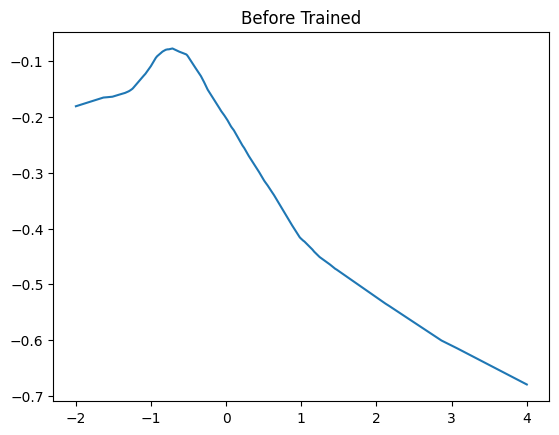

In [ ]:
with torch.no_grad():
    y = f_neu(x)

plt.plot(x.detach(), y)
plt.title("Before Trained")
plt.show()

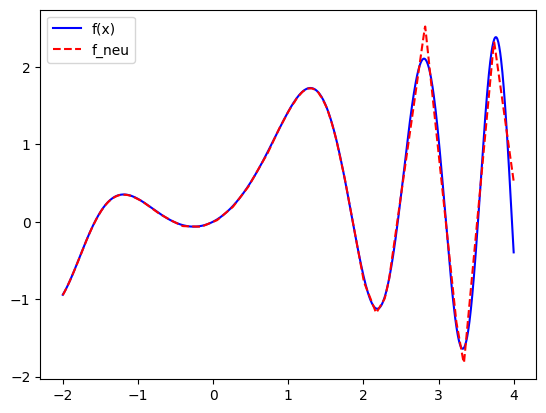

In [ ]:
criterion = nn.MSELoss()
optimizer = optim.Adam(f_neu.parameters(), lr=0.001)
loss_history = []

for epoch in range(50000):
    z = f_neu(x)
    loss = criterion(z, f)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    loss_history.append(loss.item())

with torch.no_grad():
    z_predicted = f_neu(x)

plt.plot(x, f, c="blue", label = "f(x)")
plt.plot(x, z_predicted, c = "red", linestyle = "--", label ="f_neu")
plt.legend()
plt.show()

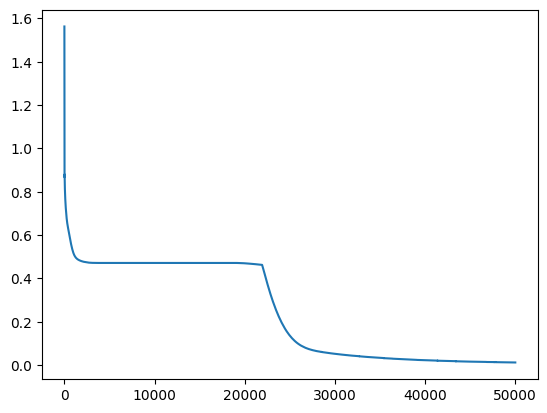

In [ ]:
plt.plot(loss_history)
plt.show()

Exercise 2

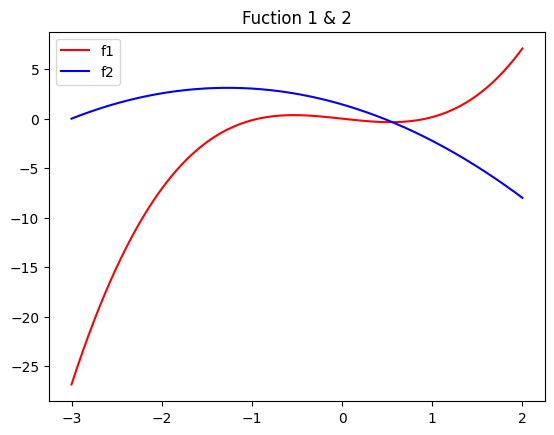

In [ ]:
x = torch.linspace(-3, 2, 1000).unsqueeze(1)
y = torch.linspace(0, 2, 1000).unsqueeze(1)
f1 = x ** 3 - torch.sin(x)
f2 = y**2 - 3*x*y

plt.plot(x, f1, label = "f1", color="r")
plt.plot(x, f2, label = "f2", color='b')
plt.title("Fuction 1 & 2")
plt.legend()
plt.show()

In [ ]:
X_grid, Y_grid = torch.meshgrid(x, y, indexing='ij')
inputs = torch.stack([X_grid.flatten(), Y_grid.flatten()], dim=1)

input.detach()
z = inputs[1]**2 - 3*inputs[0]*inputs[1]

fig = plt.figure(figsize=(7,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_grid.numpy(), Y_grid.numpy(), z, cmap='viridis')
ax.set_title("Surface plot of g(x, y)")
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("g(x, y)")
plt.show()

RuntimeError: torch.meshgrid: Expected 0D or 1D tensor in the tensor list but got: -3.0000
-2.9950
-2.9900
-2.9850
-2.9800
-2.9750
-2.9700
-2.9650
-2.9600
-2.9550
-2.9499
-2.9449
-2.9399
-2.9349
-2.9299
-2.9249
-2.9199
-2.9149
-2.9099
-2.9049
-2.8999
-2.8949
-2.8899
-2.8849
-2.8799
-2.8749
-2.8699
-2.8649
-2.8599
-2.8549
-2.8498
-2.8448
-2.8398
-2.8348
-2.8298
-2.8248
-2.8198
-2.8148
-2.8098
-2.8048
-2.7998
-2.7948
-2.7898
-2.7848
-2.7798
-2.7748
-2.7698
-2.7648
-2.7598
-2.7548
-2.7497
-2.7447
-2.7397
-2.7347
-2.7297
-2.7247
-2.7197
-2.7147
-2.7097
-2.7047
-2.6997
-2.6947
-2.6897
-2.6847
-2.6797
-2.6747
-2.6697
-2.6647
-2.6597
-2.6547
-2.6496
-2.6446
-2.6396
-2.6346
-2.6296
-2.6246
-2.6196
-2.6146
-2.6096
-2.6046
-2.5996
-2.5946
-2.5896
-2.5846
-2.5796
-2.5746
-2.5696
-2.5646
-2.5596
-2.5546
-2.5495
-2.5445
-2.5395
-2.5345
-2.5295
-2.5245
-2.5195
-2.5145
-2.5095
-2.5045
-2.4995
-2.4945
-2.4895
-2.4845
-2.4795
-2.4745
-2.4695
-2.4645
-2.4595
-2.4545
-2.4494
-2.4444
-2.4394
-2.4344
-2.4294
-2.4244
-2.4194
-2.4144
-2.4094
-2.4044
-2.3994
-2.3944
-2.3894
-2.3844
-2.3794
-2.3744
-2.3694
-2.3644
-2.3594
-2.3544
-2.3493
-2.3443
-2.3393
-2.3343
-2.3293
-2.3243
-2.3193
-2.3143
-2.3093
-2.3043
-2.2993
-2.2943
-2.2893
-2.2843
-2.2793
-2.2743
-2.2693
-2.2643
-2.2593
-2.2543
-2.2492
-2.2442
-2.2392
-2.2342
-2.2292
-2.2242
-2.2192
-2.2142
-2.2092
-2.2042
-2.1992
-2.1942
-2.1892
-2.1842
-2.1792
-2.1742
-2.1692
-2.1642
-2.1592
-2.1542
-2.1491
-2.1441
-2.1391
-2.1341
-2.1291
-2.1241
-2.1191
-2.1141
-2.1091
-2.1041
-2.0991
-2.0941
-2.0891
-2.0841
-2.0791
-2.0741
-2.0691
-2.0641
-2.0591
-2.0541
-2.0490
-2.0440
-2.0390
-2.0340
-2.0290
-2.0240
-2.0190
-2.0140
-2.0090
-2.0040
-1.9990
-1.9940
-1.9890
-1.9840
-1.9790
-1.9740
-1.9690
-1.9640
-1.9590
-1.9540
-1.9489
-1.9439
-1.9389
-1.9339
-1.9289
-1.9239
-1.9189
-1.9139
-1.9089
-1.9039
-1.8989
-1.8939
-1.8889
-1.8839
-1.8789
-1.8739
-1.8689
-1.8639
-1.8589
-1.8539
-1.8488
-1.8438
-1.8388
-1.8338
-1.8288
-1.8238
-1.8188
-1.8138
-1.8088
-1.8038
-1.7988
-1.7938
-1.7888
-1.7838
-1.7788
-1.7738
-1.7688
-1.7638
-1.7588
-1.7538
-1.7487
-1.7437
-1.7387
-1.7337
-1.7287
-1.7237
-1.7187
-1.7137
-1.7087
-1.7037
-1.6987
-1.6937
-1.6887
-1.6837
-1.6787
-1.6737
-1.6687
-1.6637
-1.6587
-1.6537
-1.6486
-1.6436
-1.6386
-1.6336
-1.6286
-1.6236
-1.6186
-1.6136
-1.6086
-1.6036
-1.5986
-1.5936
-1.5886
-1.5836
-1.5786
-1.5736
-1.5686
-1.5636
-1.5586
-1.5536
-1.5485
-1.5435
-1.5385
-1.5335
-1.5285
-1.5235
-1.5185
-1.5135
-1.5085
-1.5035
-1.4985
-1.4935
-1.4885
-1.4835
-1.4785
-1.4735
-1.4685
-1.4635
-1.4585
-1.4535
-1.4484
-1.4434
-1.4384
-1.4334
-1.4284
-1.4234
-1.4184
-1.4134
-1.4084
-1.4034
-1.3984
-1.3934
-1.3884
-1.3834
-1.3784
-1.3734
-1.3684
-1.3634
-1.3584
-1.3534
-1.3483
-1.3433
-1.3383
-1.3333
-1.3283
-1.3233
-1.3183
-1.3133
-1.3083
-1.3033
-1.2983
-1.2933
-1.2883
-1.2833
-1.2783
-1.2733
-1.2683
-1.2633
-1.2583
-1.2533
-1.2482
-1.2432
-1.2382
-1.2332
-1.2282
-1.2232
-1.2182
-1.2132
-1.2082
-1.2032
-1.1982
-1.1932
-1.1882
-1.1832
-1.1782
-1.1732
-1.1682
-1.1632
-1.1582
-1.1532
-1.1481
-1.1431
-1.1381
-1.1331
-1.1281
-1.1231
-1.1181
-1.1131
-1.1081
-1.1031
-1.0981
-1.0931
-1.0881
-1.0831
-1.0781
-1.0731
-1.0681
-1.0631
-1.0581
-1.0531
-1.0480
-1.0430
-1.0380
-1.0330
-1.0280
-1.0230
-1.0180
-1.0130
-1.0080
-1.0030
-0.9980
-0.9930
-0.9880
-0.9830
-0.9780
-0.9730
-0.9680
-0.9630
-0.9580
-0.9530
-0.9479
-0.9429
-0.9379
-0.9329
-0.9279
-0.9229
-0.9179
-0.9129
-0.9079
-0.9029
-0.8979
-0.8929
-0.8879
-0.8829
-0.8779
-0.8729
-0.8679
-0.8629
-0.8579
-0.8529
-0.8478
-0.8428
-0.8378
-0.8328
-0.8278
-0.8228
-0.8178
-0.8128
-0.8078
-0.8028
-0.7978
-0.7928
-0.7878
-0.7828
-0.7778
-0.7728
-0.7678
-0.7628
-0.7578
-0.7528
-0.7477
-0.7427
-0.7377
-0.7327
-0.7277
-0.7227
-0.7177
-0.7127
-0.7077
-0.7027
-0.6977
-0.6927
-0.6877
-0.6827
-0.6777
-0.6727
-0.6677
-0.6627
-0.6577
-0.6527
-0.6476
-0.6426
-0.6376
-0.6326
-0.6276
-0.6226
-0.6176
-0.6126
-0.6076
-0.6026
-0.5976
-0.5926
-0.5876
-0.5826
-0.5776
-0.5726
-0.5676
-0.5626
-0.5576
-0.5526
-0.5475
-0.5425
-0.5375
-0.5325
-0.5275
-0.5225
-0.5175
-0.5125
-0.5075
-0.5025
-0.4975
-0.4925
-0.4875
-0.4825
-0.4775
-0.4725
-0.4675
-0.4625
-0.4575
-0.4525
-0.4474
-0.4424
-0.4374
-0.4324
-0.4274
-0.4224
-0.4174
-0.4124
-0.4074
-0.4024
-0.3974
-0.3924
-0.3874
-0.3824
-0.3774
-0.3724
-0.3674
-0.3624
-0.3574
-0.3524
-0.3473
-0.3423
-0.3373
-0.3323
-0.3273
-0.3223
-0.3173
-0.3123
-0.3073
-0.3023
-0.2973
-0.2923
-0.2873
-0.2823
-0.2773
-0.2723
-0.2673
-0.2623
-0.2573
-0.2523
-0.2472
-0.2422
-0.2372
-0.2322
-0.2272
-0.2222
-0.2172
-0.2122
-0.2072
-0.2022
-0.1972
-0.1922
-0.1872
-0.1822
-0.1772
-0.1722
-0.1672
-0.1622
-0.1572
-0.1522
-0.1471
-0.1421
-0.1371
-0.1321
-0.1271
-0.1221
-0.1171
-0.1121
-0.1071
-0.1021
-0.0971
-0.0921
-0.0871
-0.0821
-0.0771
-0.0721
-0.0671
-0.0621
-0.0571
-0.0521
-0.0470
-0.0420
-0.0370
-0.0320
-0.0270
-0.0220
-0.0170
-0.0120
-0.0070
-0.0020
 0.0030
 0.0080
 0.0130
 0.0180
 0.0230
 0.0280
 0.0330
 0.0380
 0.0430
 0.0480
 0.0531
 0.0581
 0.0631
 0.0681
 0.0731
 0.0781
 0.0831
 0.0881
 0.0931
 0.0981
 0.1031
 0.1081
 0.1131
 0.1181
 0.1231
 0.1281
 0.1331
 0.1381
 0.1431
 0.1481
 0.1532
 0.1582
 0.1632
 0.1682
 0.1732
 0.1782
 0.1832
 0.1882
 0.1932
 0.1982
 0.2032
 0.2082
 0.2132
 0.2182
 0.2232
 0.2282
 0.2332
 0.2382
 0.2432
 0.2482
 0.2533
 0.2583
 0.2633
 0.2683
 0.2733
 0.2783
 0.2833
 0.2883
 0.2933
 0.2983
 0.3033
 0.3083
 0.3133
 0.3183
 0.3233
 0.3283
 0.3333
 0.3383
 0.3433
 0.3483
 0.3534
 0.3584
 0.3634
 0.3684
 0.3734
 0.3784
 0.3834
 0.3884
 0.3934
 0.3984
 0.4034
 0.4084
 0.4134
 0.4184
 0.4234
 0.4284
 0.4334
 0.4384
 0.4434
 0.4484
 0.4535
 0.4585
 0.4635
 0.4685
 0.4735
 0.4785
 0.4835
 0.4885
 0.4935
 0.4985
 0.5035
 0.5085
 0.5135
 0.5185
 0.5235
 0.5285
 0.5335
 0.5385
 0.5435
 0.5485
 0.5536
 0.5586
 0.5636
 0.5686
 0.5736
 0.5786
 0.5836
 0.5886
 0.5936
 0.5986
 0.6036
 0.6086
 0.6136
 0.6186
 0.6236
 0.6286
 0.6336
 0.6386
 0.6436
 0.6486
 0.6537
 0.6587
 0.6637
 0.6687
 0.6737
 0.6787
 0.6837
 0.6887
 0.6937
 0.6987
 0.7037
 0.7087
 0.7137
 0.7187
 0.7237
 0.7287
 0.7337
 0.7387
 0.7437
 0.7487
 0.7538
 0.7588
 0.7638
 0.7688
 0.7738
 0.7788
 0.7838
 0.7888
 0.7938
 0.7988
 0.8038
 0.8088
 0.8138
 0.8188
 0.8238
 0.8288
 0.8338
 0.8388
 0.8438
 0.8488
 0.8539
 0.8589
 0.8639
 0.8689
 0.8739
 0.8789
 0.8839
 0.8889
 0.8939
 0.8989
 0.9039
 0.9089
 0.9139
 0.9189
 0.9239
 0.9289
 0.9339
 0.9389
 0.9439
 0.9489
 0.9540
 0.9590
 0.9640
 0.9690
 0.9740
 0.9790
 0.9840
 0.9890
 0.9940
 0.9990
 1.0040
 1.0090
 1.0140
 1.0190
 1.0240
 1.0290
 1.0340
 1.0390
 1.0440
 1.0490
 1.0541
 1.0591
 1.0641
 1.0691
 1.0741
 1.0791
 1.0841
 1.0891
 1.0941
 1.0991
 1.1041
 1.1091
 1.1141
 1.1191
 1.1241
 1.1291
 1.1341
 1.1391
 1.1441
 1.1491
 1.1542
 1.1592
 1.1642
 1.1692
 1.1742
 1.1792
 1.1842
 1.1892
 1.1942
 1.1992
 1.2042
 1.2092
 1.2142
 1.2192
 1.2242
 1.2292
 1.2342
 1.2392
 1.2442
 1.2492
 1.2543
 1.2593
 1.2643
 1.2693
 1.2743
 1.2793
 1.2843
 1.2893
 1.2943
 1.2993
 1.3043
 1.3093
 1.3143
 1.3193
 1.3243
 1.3293
 1.3343
 1.3393
 1.3443
 1.3493
 1.3544
 1.3594
 1.3644
 1.3694
 1.3744
 1.3794
 1.3844
 1.3894
 1.3944
 1.3994
 1.4044
 1.4094
 1.4144
 1.4194
 1.4244
 1.4294
 1.4344
 1.4394
 1.4444
 1.4494
 1.4545
 1.4595
 1.4645
 1.4695
 1.4745
 1.4795
 1.4845
 1.4895
 1.4945
 1.4995
 1.5045
 1.5095
 1.5145
 1.5195
 1.5245
 1.5295
 1.5345
 1.5395
 1.5445
 1.5495
 1.5546
 1.5596
 1.5646
 1.5696
 1.5746
 1.5796
 1.5846
 1.5896
 1.5946
 1.5996
 1.6046
 1.6096
 1.6146
 1.6196
 1.6246
 1.6296
 1.6346
 1.6396
 1.6446
 1.6496
 1.6547
 1.6597
 1.6647
 1.6697
 1.6747
 1.6797
 1.6847
 1.6897
 1.6947
 1.6997
 1.7047
 1.7097
 1.7147
 1.7197
 1.7247
 1.7297
 1.7347
 1.7397
 1.7447
 1.7497
 1.7548
 1.7598
 1.7648
 1.7698
 1.7748
 1.7798
 1.7848
 1.7898
 1.7948
 1.7998
 1.8048
 1.8098
 1.8148
 1.8198
 1.8248
 1.8298
 1.8348
 1.8398
 1.8448
 1.8498
 1.8549
 1.8599
 1.8649
 1.8699
 1.8749
 1.8799
 1.8849
 1.8899
 1.8949
 1.8999
 1.9049
 1.9099
 1.9149
 1.9199
 1.9249
 1.9299
 1.9349
 1.9399
 1.9449
 1.9499
 1.9550
 1.9600
 1.9650
 1.9700
 1.9750
 1.9800
 1.9850
 1.9900
 1.9950
 2.0000
[ torch.FloatTensor{1000,1} ]